In [29]:
import glob
import os

# ファイルのリストを取得
files_cubic = glob.glob("../input/material_projects_maked_xrd_pattern_cubic/*.csv")

In [30]:
import pandas as pd

# データフレームのリストを作成
df_cubic = [pd.read_csv(file_path) for file_path in files_cubic]

# 各データフレームの先頭を確認
data_frames_head = [df.head() for df in df_cubic]
data_frames_head

[   2theta  Intensity
 0    5.00   0.003950
 1    5.01   0.003953
 2    5.02   0.003956
 3    5.03   0.003959
 4    5.04   0.003962,
    2theta  Intensity
 0    5.00   0.003205
 1    5.01   0.003207
 2    5.02   0.003209
 3    5.03   0.003211
 4    5.04   0.003213,
    2theta  Intensity
 0    5.00   0.006533
 1    5.01   0.006539
 2    5.02   0.006544
 3    5.03   0.006550
 4    5.04   0.006556,
    2theta  Intensity
 0    5.00   0.003600
 1    5.01   0.003602
 2    5.02   0.003604
 3    5.03   0.003607
 4    5.04   0.003609,
    2theta  Intensity
 0    5.00   0.004352
 1    5.01   0.004356
 2    5.02   0.004359
 3    5.03   0.004362
 4    5.04   0.004366,
    2theta  Intensity
 0    5.00   0.004008
 1    5.01   0.004011
 2    5.02   0.004014
 3    5.03   0.004016
 4    5.04   0.004019,
    2theta  Intensity
 0    5.00   0.002682
 1    5.01   0.002684
 2    5.02   0.002686
 3    5.03   0.002688
 4    5.04   0.002690,
    2theta  Intensity
 0    5.00   0.002773
 1    5.01   0.002775
 2 

In [31]:
# ファイルのリストを取得
files_not_cubic = glob.glob(
    "../input/material_projects_maked_xrd_pattern_not_cubic/*.csv"
)

# ファイルのリストを表示
print(files_not_cubic)

['../input/material_projects_maked_xrd_pattern_not_cubic/cif_mp-1001835_LiB.cif_xrd_pattern.csv', '../input/material_projects_maked_xrd_pattern_not_cubic/cif_mp-1002181_TcN.cif_xrd_pattern.csv', '../input/material_projects_maked_xrd_pattern_not_cubic/cif_mp-1002182_TcN.cif_xrd_pattern.csv', '../input/material_projects_maked_xrd_pattern_not_cubic/cif_mp-1003320_CaMn4O8.cif_xrd_pattern.csv', '../input/material_projects_maked_xrd_pattern_not_cubic/cif_mp-1004532_CCl4.cif_xrd_pattern.csv', '../input/material_projects_maked_xrd_pattern_not_cubic/cif_mp-10051_TeAs.cif_xrd_pattern.csv', '../input/material_projects_maked_xrd_pattern_not_cubic/cif_mp-10059_ZrCo3B2.cif_xrd_pattern.csv', '../input/material_projects_maked_xrd_pattern_not_cubic/cif_mp-1006056_PaNi2Ge.cif_xrd_pattern.csv', '../input/material_projects_maked_xrd_pattern_not_cubic/cif_mp-1006399_CeZnIn.cif_xrd_pattern.csv', '../input/material_projects_maked_xrd_pattern_not_cubic/cif_mp-1006588_Zn3In2O6.cif_xrd_pattern.csv', '../input/m

In [32]:
# データフレームのリストを作成
df_not_cubic = [pd.read_csv(file_path) for file_path in files_not_cubic]

# 各データフレームの先頭を確認
data_frames_head_ = [df.head() for df in df_not_cubic]
data_frames_head_

[   2theta  Intensity
 0    5.00   0.015479
 1    5.01   0.015492
 2    5.02   0.015505
 3    5.03   0.015518
 4    5.04   0.015531,
    2theta  Intensity
 0    5.00   0.002851
 1    5.01   0.002853
 2    5.02   0.002855
 3    5.03   0.002857
 4    5.04   0.002858,
    2theta  Intensity
 0    5.00   0.003093
 1    5.01   0.003095
 2    5.02   0.003097
 3    5.03   0.003098
 4    5.04   0.003100,
    2theta  Intensity
 0    5.00   0.083913
 1    5.01   0.084065
 2    5.02   0.084217
 3    5.03   0.084370
 4    5.04   0.084523,
    2theta  Intensity
 0    5.00   0.053315
 1    5.01   0.053377
 2    5.02   0.053438
 3    5.03   0.053500
 4    5.04   0.053562,
    2theta  Intensity
 0    5.00   0.004180
 1    5.01   0.004183
 2    5.02   0.004186
 3    5.03   0.004189
 4    5.04   0.004192,
    2theta  Intensity
 0    5.00   0.004055
 1    5.01   0.004058
 2    5.02   0.004060
 3    5.03   0.004063
 4    5.04   0.004065,
    2theta  Intensity
 0    5.00   0.003567
 1    5.01   0.003569
 2 

In [33]:
import numpy as np
from sklearn.decomposition import PCA

# 2thetaの範囲を確認し、共通の2theta範囲を設定する
theta_min = max(df["2theta"].min() for df in df_cubic)
theta_max = min(df["2theta"].max() for df in df_cubic)
common_2theta = np.arange(theta_min, theta_max, 0.01)

# 各データフレームを共通の2theta範囲に内挿する
interpolated_data = []
for df in df_cubic:
    interpolated_intensity = np.interp(common_2theta, df["2theta"], df["Intensity"])
    interpolated_data.append(interpolated_intensity)

# データを行列に変換
data_matrix = np.array(interpolated_data)

# PCAを実行
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_matrix)

# PCA結果をDataFrameに変換
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df

,PC1,PC2
0,10.359609,570.795593
1,-180.191293,-249.980674
2,-189.493812,-51.056022
3,531.770855,-711.173173
4,-86.659361,-261.475711
...,...,...
4570,-62.570789,50.653773
4571,-61.632583,37.594624
4572,32.490406,-47.123130
4573,-170.453114,7.229040


In [34]:
# 2thetaの範囲を確認し、共通の2theta範囲を設定する
theta_min = max(df["2theta"].min() for df in df_not_cubic)
theta_max = min(df["2theta"].max() for df in df_not_cubic)
common_2theta = np.arange(theta_min, theta_max, 0.01)

# 各データフレームを共通の2theta範囲に内挿する
interpolated_data_ = []
for df in df_not_cubic:
    interpolated_intensity = np.interp(common_2theta, df["2theta"], df["Intensity"])
    interpolated_data_.append(interpolated_intensity)

# データを行列に変換
data_matrix_ = np.array(interpolated_data_)

# PCAを実行
pca = PCA(n_components=2)
pca_result_ = pca.fit_transform(data_matrix_)

# PCA結果をDataFrameに変換
pca_df_ = pd.DataFrame(pca_result_, columns=["PC1", "PC2"])
pca_df_

,PC1,PC2
0,-493.502083,29.377564
1,-919.387083,-144.543774
2,-933.906035,-111.116136
3,1048.541634,1018.307812
4,1805.162523,-162.181510
...,...,...
5420,-634.097173,-746.341077
5421,-1077.461645,-241.371412
5422,-677.524547,-95.716544
5423,-769.750381,16.589824


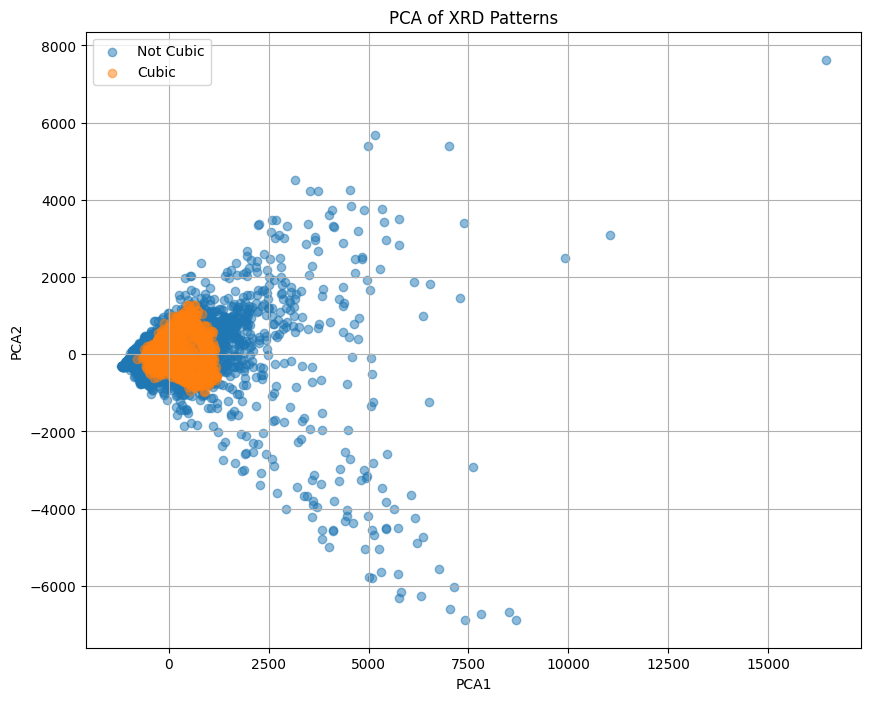

In [35]:
import matplotlib.pyplot as plt

# PCA結果をプロット
plt.figure(figsize=(10, 8))
plt.scatter(pca_df_["PC1"], pca_df_["PC2"], alpha=0.5)
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.5)
plt.legend(["Not Cubic", "Cubic"])


plt.title("PCA of XRD Patterns")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()

In [36]:
params = {
    "objective": "binary",
    "learning_rate": 0.01,
    "reg_alpha": 0.1,
    "reg_lambda": 0.1,
    "random_state":42,
    "max_depth": 5,
    "n_estimators": 1000, 
    "colsample_bytree": 0.7,
    'is_unbalance':True,
}

In [37]:
# pca_dfをPositive、pca_df_をNegativeとしてラベルを付与
pca_df["Label"] = "Positive"
pca_df_["Label"] = "Negative"

# PositiveとNegativeのデータを結合
pca_df_all = pd.concat([pca_df, pca_df_], ignore_index=True)

# train_test_split関数をインポート
from sklearn.model_selection import train_test_split

# データを説明変数と目的変数に分割
X = pca_df_all[["PC1", "PC2"]]
y = pca_df_all["Label"]

# データを学習用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# LightGBMClassifierをインポート
import lightgbm as lgbm

# モデルを作成
model = lgbm.LGBMClassifier(**params)

# モデルを学習
model.fit(
          X_train, y_train,
          eval_set = [(X_test, y_test)],
          eval_metric = "rmse",
          callbacks=[lgbm.early_stopping(stopping_rounds=10)]
)

# テストデータで予測
y_pred = model.predict(X_test)

# accuracy_score関数をインポート
from sklearn.metrics import accuracy_score

# 正解率を計算
accuracy = accuracy_score(y_test, y_pred)

# 正解率を表示
print(f"正解率: {accuracy:.2f}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3674, number of negative: 4326
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 2
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.459250 -> initscore=-0.163362
[LightGBM] [Info] Start training from score -0.163362
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve

In [38]:
# F1スコア、適合率、再現率を計算
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(y_test, y_pred, pos_label="Positive")
precision = precision_score(y_test, y_pred, pos_label="Positive")
recall = recall_score(y_test, y_pred, pos_label="Positive")

# F1スコア、適合率、再現率を表示
print(f"F1スコア: {f1:.2f}")
print(f"適合率: {precision:.2f}")
print(f"再現率: {recall:.2f}")

F1スコア: 0.78
適合率: 0.72
再現率: 0.84


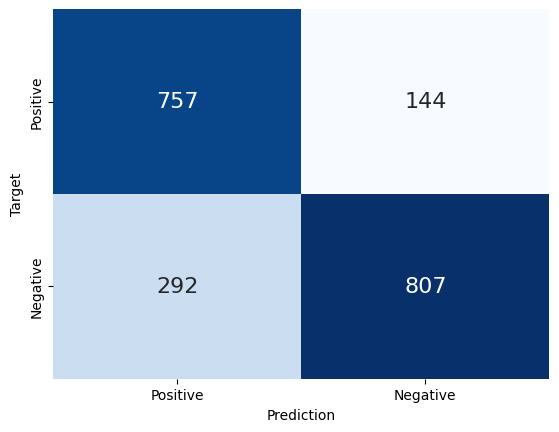

In [39]:
# 混同行列を表示
from sklearn.metrics import confusion_matrix

# 混同行列を計算
cm = confusion_matrix(y_test, y_pred)

# 混同行列をmatplotlibでプロット
import seaborn as sns

# confusion matrixを左上がTrue Positive、右上がFalse Positive、左下がFalse Negative、右下がTrue Negativeになるように可視化
sns.heatmap(cm[::-1, ::-1], annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 16})
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.xticks([0.5, 1.5], ['Positive', 'Negative'])
plt.yticks([0.5, 1.5], ['Positive', 'Negative'])
plt.show()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


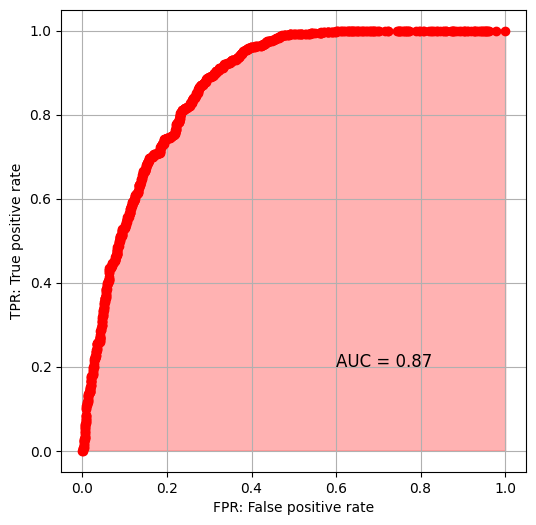

In [40]:
# ROC曲線をプロット
from sklearn.metrics import roc_curve

# テストデータで予測
y_pred_proba = model.predict_proba(X_test)[:, 1]

# ROC曲線を計算
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label="Positive")

# AUCを計算
from sklearn.metrics import roc_auc_score

# AUCを計算
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, marker="o", color="r")
plt.fill_between(fpr, tpr, color="r", alpha=0.3)
plt.xlabel("FPR: False positive rate")
plt.ylabel("TPR: True positive rate")
plt.grid()
# AUCをグラフ内に表示
plt.text(0.6, 0.2, f"AUC = {auc:.2f}", fontsize=12)
plt.show()